
# Project: Investigate a Dataset (Movie Data Base!)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>

<li><a href="#wrangling">Data Wrangling</a></li> 
<ul>
    <li><a href="#General Properties">General Properties</a></li>
  
   <li> <a href="#Data Cleaning">Data Cleaning</a></li>
    <ul>
    <li> <a href="#Dropping Columns">Dropping Columns</a></li>
    <li> <a href="#Splitting Values">Splitting Values</a></li> 
    <li> <a href="#notes about Null values">notes about Null values</a></li>
    </ul>
</ul>
<li><a href="#eda">Exploratory Data Analysis</a></li> 
<ul>
    <li><a href="#Proprities of data and box plot">Proprities of data and box plot</a></li>
    <li><a href="#notes about box plots and outliers">notes about box plots and outliers</a></li> 
    <li><a href="#Questions">Questions</a></li>
   </ul>
<li><a href="#limitations">limitations</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
# Introduction
I've chosen the TMDB data set becuase I'm intersted in movies and want to know some facts about the market


those are the questions:
- Question 1 : Which data  are correlated ?
- Question 2 (generes sorted with runtime!)
- Question 3 (most popular genre for every year!)
- Question 4 (what genres that producer would like to consider to get highest profit?)
- Question 5 (most popular genres of all time?)
- Question 6 (what are top 10 highest profit movies?)
- Question 7 (what are top 10  titles with longest time?)
- Question 8 (Directors that are most productive?)
- Question 9 (Top 10 directors that make movies with high profit?)
- Question 10 (Most hired Acotrs?)
- Question 11 (Most productive Companies?)
- Question 12 (Companies with highest profit?)
- Question 13 (What does change when movies seperated from TV shows?)

I used padnas n, numpy ,matplotlib

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
%matplotlib inline


 

<a id='wrangling'></a>
# Data Wrangling


<a id='General Properties'></a>
### General Properties
showing null values and some box plots 

In [2]:
#reading our data
data=pd.read_csv('tmdb-movies.csv')

data.isna().sum().sort_values(ascending =False)

     

homepage                7930
tagline                 2824
keywords                1493
production_companies    1030
cast                      76
director                  44
genres                    23
imdb_id                   10
overview                   4
popularity                 0
budget                     0
revenue                    0
original_title             0
revenue_adj                0
budget_adj                 0
runtime                    0
release_date               0
vote_count                 0
vote_average               0
release_year               0
id                         0
dtype: int64

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [4]:
 
print(data[data.budget==0].budget.count())
print(data[data.revenue==0].budget.count())
print(data[data.budget_adj==0].budget.count())
print(data[data.revenue_adj==0].budget.count())
#drop not needed columns
    
data.drop(labels=['budget','revenue','id','imdb_id','homepage','release_date'],inplace=True,axis=1)


5696
6016
5696
6016


<a id='Data Cleaning'></a>
# Data Cleaning 
<a id='Dropping Columns'></a>
### Dropping Columns
some columns can be dropped like:
- **budget**     (we use budget_adj as gives more accurate information based on inflation)               
- **revenue**    (we use revune_adj as gives more accurate information based on inflation)  
- **id**         (as its title is enough)
- **imdb_id**    (as its title is enough)
- **home_page**  (I think no need for it)
<a id='Splitting Values'></a>

### Splitting Values:

some columns uses '|' to combine many values ...I will seperate each value for seperate row in the following columns :
 - genres 
 - director
 - cast
 - production_companies
 
 note that I create N **rows** for each N values  sperated ***not columns*** to make calling ```groupby``` easier as I think sepreating into columns will make it harder 
 I can easily call groupby("cast") and do some operations to find names of most hired actors
 I think using https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.get_dummies.html will lead to harder approach when using ```groupby()``` that lead me building that function  ```split_value_in_column_to_rows``` to help my analyzing **nominal** data like Actor's names , companies' names and directors to know **most hired actors , most productive companies .......**
 
    for example: when movie with cast "actor1|actor2": 
    there will be 2 rows for the same movie with same values excpect for cast value in one it "actor1" and in other it is "actor2"
    that makes it easier to make groupby(genres) instead of spliting each value into sepreate columns that gives alot of columns





<a id='notes about Null values'></a>

## notes about Null values 
- there are too many missing homepages , taglines ,production companies:
    - we may get rid of tagline column as I think genres is enough for my questions
    - we may leave companies as it is ....it can be helpful later
    - for budget , budget_adj ,  revenue ,revenue_adj :
        - there is no null or nan values but there is too many values with zeros (we may consider zero as null in this case)



In [5]:
#this part for counting maximum number of combined values for columns we want to split the values inside it
"""
    for example: when movie with genres "Action|commedy": 
    there will be 2 rows for the same movie with same values excpect for genres value in one it "action" and in other it is "comedy"
    that makes it easier to make groupby(genres) instead of spliting each value into sepreate columns that gives alot of columns
    """
d_size=data.dropna(subset=['genres','director','cast','production_companies']) 
"""
cast_size : maximum amount of cast names contained in one cell
genres_size
director_size
production_companies_size

"""

d_size.genres=d_size.genres.apply(lambda x :len(x.split('|')))
genres_size=int(d_size.genres.max())

d_size.cast=d_size.cast.apply(lambda x :len(x.split('|')))
cast_size=int(d_size.cast.max())

d_size.director=d_size.director.apply(lambda x :len(x.split('|')))
director_size=int(d_size.director.max())

d_size.production_companies=d_size.production_companies.apply(lambda x :len(x.split('|')))
production_companies_size=int(d_size.production_companies.max())

print((cast_size,genres_size,director_size,production_companies_size))


(5, 5, 36, 5)


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [6]:
def split_value_in_column_to_rows(d,col,max_size): 
    """
    for example: when movie with genres "Action|commedy": 
    there will be 2 rows for the same movie with same values excpect for genres value in one it "action" and in other it is "comedy"
    that makes it easier to make groupby(genres) instead of spliting each value into sepreate columns that gives alot of columns
    """
    #d_return : final result
    #dx : dummy data frame that I'll modify its column values
    
    d_return=pd.DataFrame()
    d=d.copy()
    d.dropna(subset=[col],inplace=True) #we won't be able to split those values if we have null values  
    for i in range(0, max_size):
        dx=d.copy()
        dx[col]=dx[col].apply(lambda x :x.split('|')[i]  if len(x.split('|'))>i else '' )
        d_return=d_return.append(dx)
        d_return=d_return[d_return[col]!='']
    return d_return
#using sepreate data frame for each intrested Column to maintain as many data as possible as I dropped null rows in each operation 
#to analyze genres 
d_genres=split_value_in_column_to_rows(data,'genres',genres_size)
#to analyze cast
d_cast=split_value_in_column_to_rows(data,'cast',cast_size)
#to analyze directors
d_director=split_value_in_column_to_rows(data,'director',director_size)
#to analyze companies
d_companies=split_value_in_column_to_rows(data,'production_companies',production_companies_size)#to analyze companies


<a id='eda'></a>
## Exploratory Data Analysis

<a id='Proprities of data and box plot'></a>
 ### Proprities of data and box plot

In [7]:
data_described=data.describe()
data_described


,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,0.646441,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,1.000185,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,0.000065,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.207583,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,0.383856,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,0.713817,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,32.985763,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


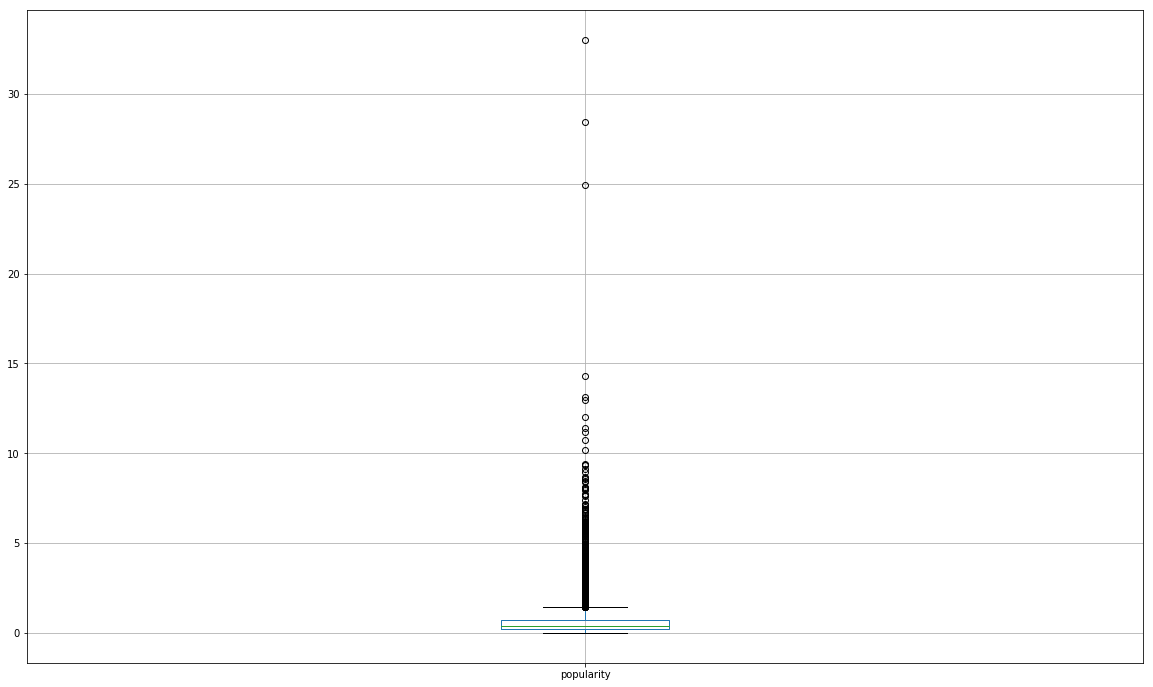

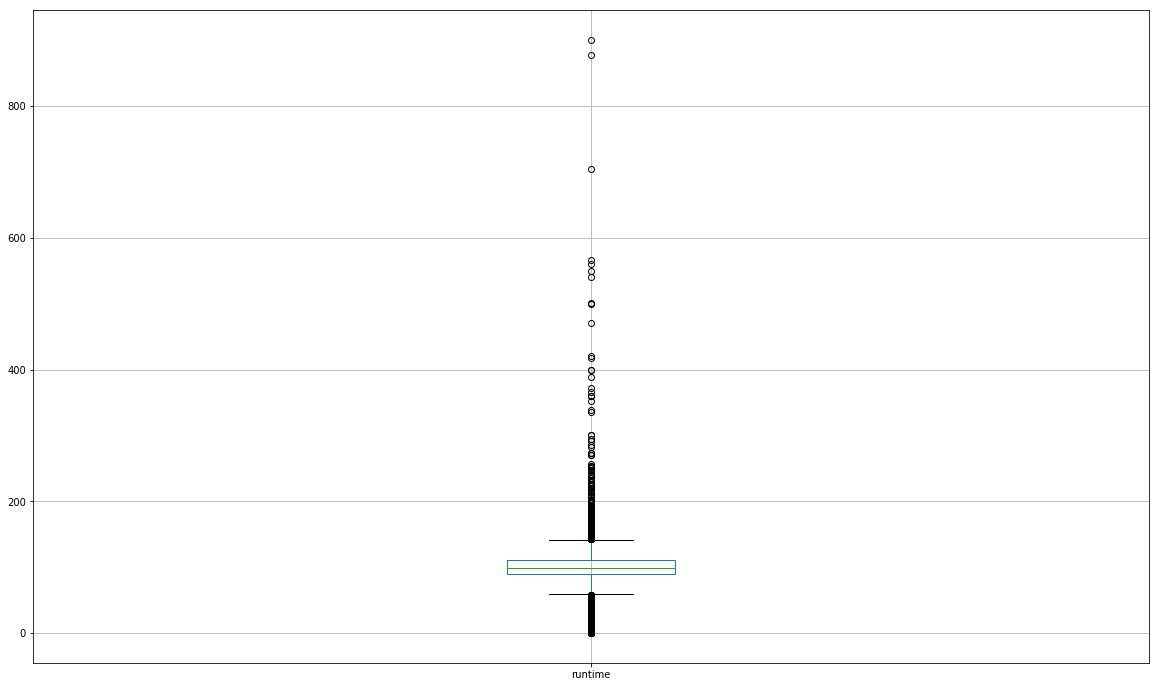

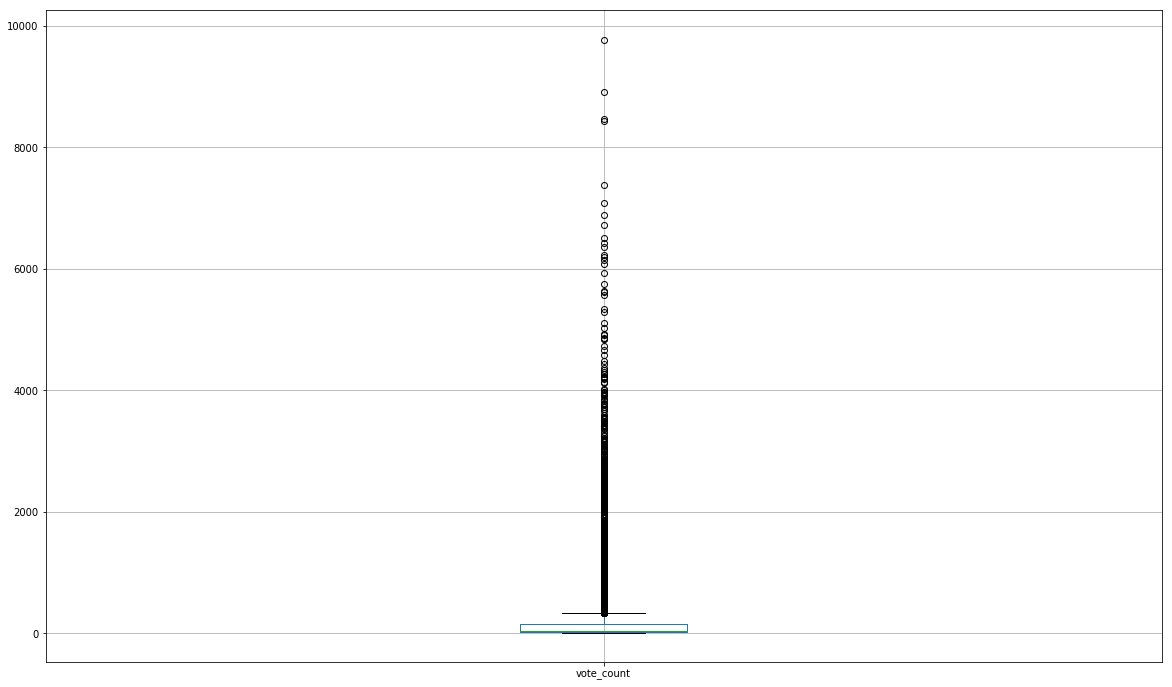

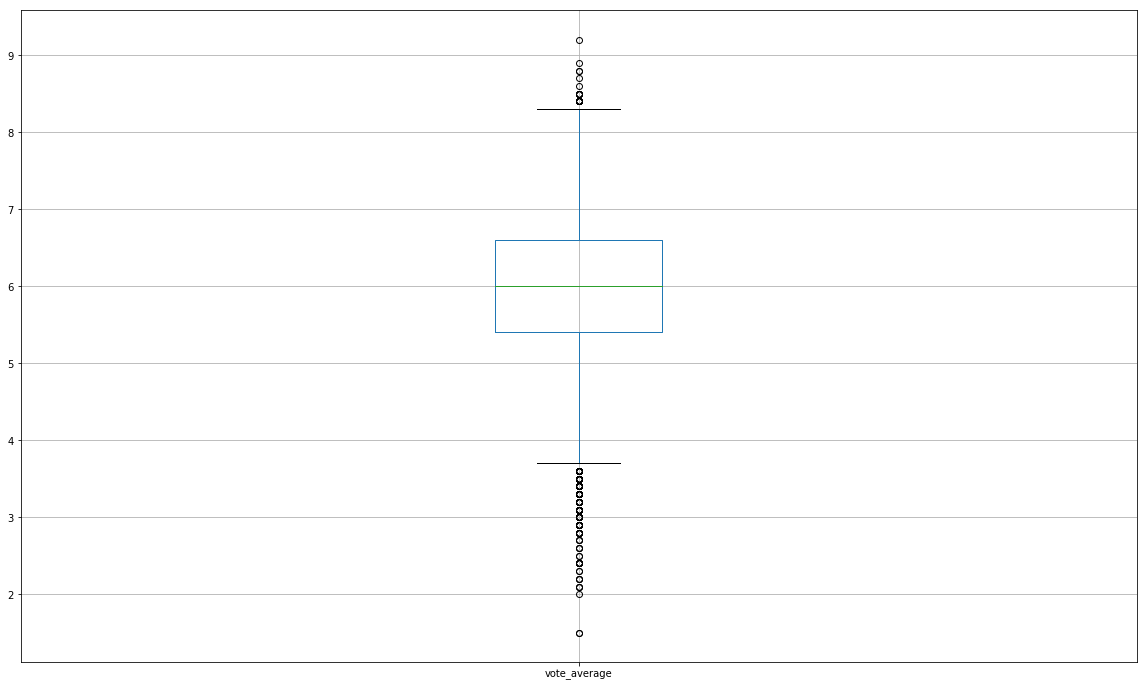

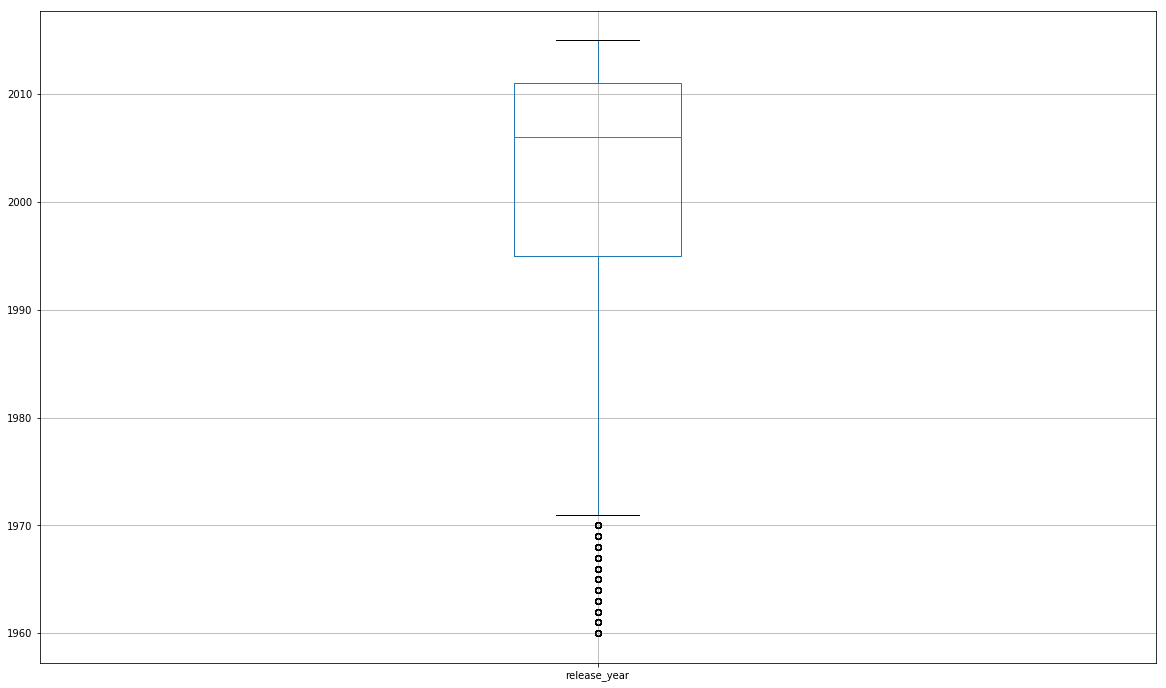

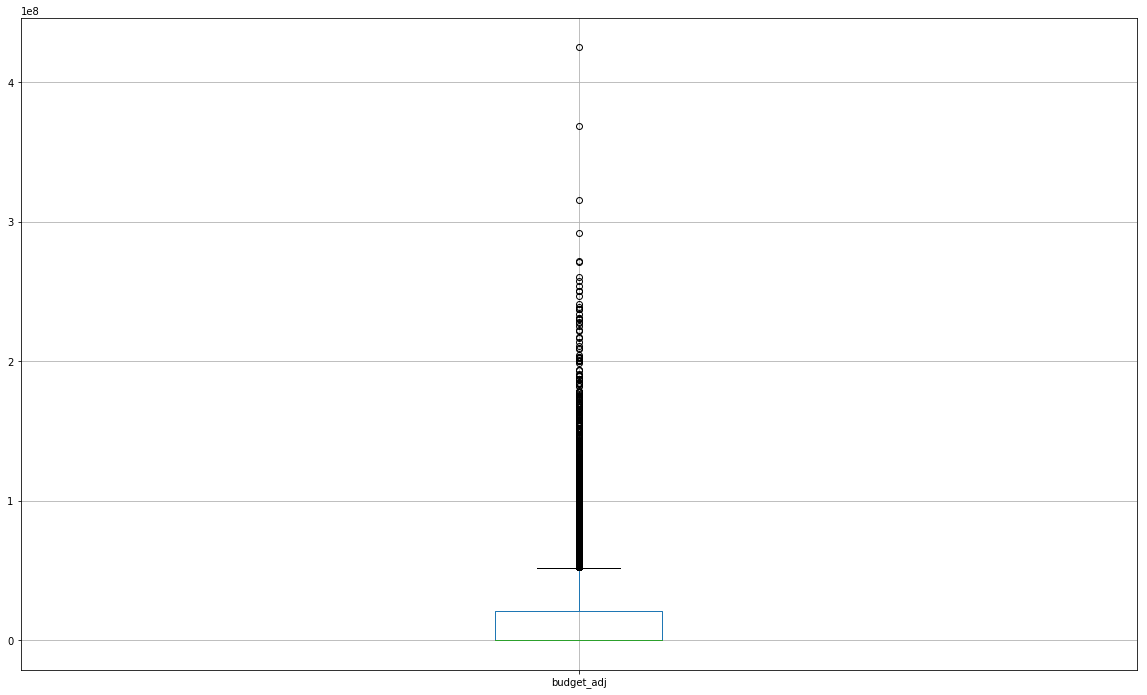

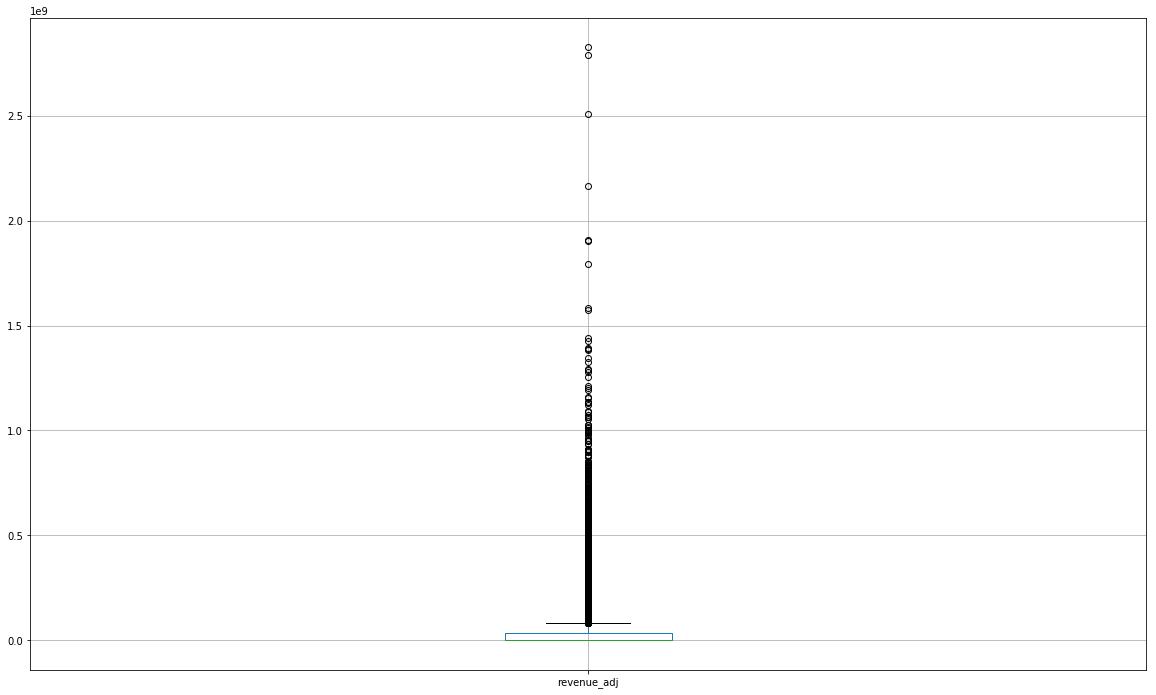

In [8]:
'''
plot box plots to know about outliers  
'''
for col in data_described.columns:
    pd.DataFrame(data[col]).boxplot(figsize=(20,12))
    plt.show()

<a id='notes about box plots and outliers'></a>
## notes about box plots and outliers: 
- there are many outliers in :
 
    -runtime(will be discussed in **Question 10** and  **Question 7** )
    
    -profit(i think it's movies that made it in box office)
    
    -budget(i think it's like Big franchises)
    
    -vote count (I think it has relation to increasing population every year)
    
    -popularity(I think it's for Big franchises or very famous movies)
 

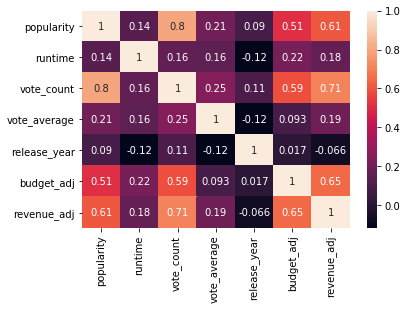

In [9]:

sn.heatmap(data.corr(), annot=True)
plt.show()



<a id='Questions'></a>
 
# Questions:

## Research Question 1 : Which data  are correlated ?

we see that most of data has no correlation but the following are correlated:
- profit and budget 
- profit and popularity 
- profit and vote_count
- vote_count and popularity 


In [10]:
def plot_scatter_with_line(x,y,xlabel,ylabel,title):
    plt.plot(x, y, 'o')
    m, b = np.polyfit(x, y, 1)#linear regression
    plt.plot(x, m*x + b)
    plt.ylabel(ylabel);
    plt.xlabel(xlabel);
    plt.title(title);
    plt.show()

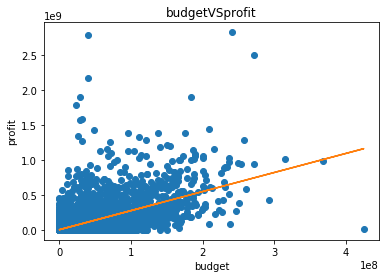

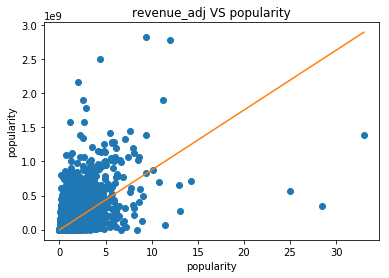

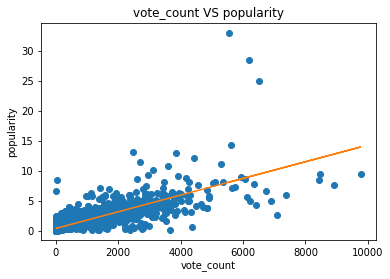

In [11]:
y=data.revenue_adj
x=data.budget_adj
plot_scatter_with_line(x,y,'budget','profit','budgetVSprofit')
(x,y)=(data.popularity,data.revenue_adj)
plot_scatter_with_line(x,y,'popularity','popularity','revenue_adj VS popularity')
(x,y)=(data.vote_count,data.popularity)
plot_scatter_with_line(x,y,'vote_count','popularity','vote_count VS popularity')


### Research Question 2 (generes sorted with runtime!)

which genre that has most running time ?
Answer: History , War ,western are the top 3

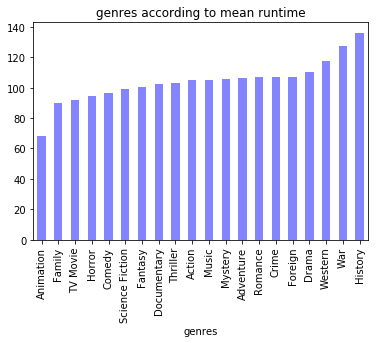

In [12]:
d_genres.groupby('genres').mean()['runtime'].sort_values().plot.bar(color=(.2,.2,1,0.6),title='genres according to mean runtime');

 

### Research Question 3 (most popular genre for every year!)


In [13]:
top_gen=pd.DataFrame()#for storing our results
for year in d_genres.release_year.unique():#pick every year and find the mean value of popularity in each genre
    top_gen=top_gen.append(d_genres.query('release_year == @year').groupby('genres',as_index=False).mean().sort_values(by='popularity')[['genres','release_year']].tail(1).copy())
top_gen.reset_index(drop=True)#just for making our data frame looking tidy
 

,genres,release_year
0,Adventure,2015.0
1,Adventure,2014.0
2,Action,1977.0
3,Adventure,2009.0
4,Adventure,2010.0
5,Adventure,1999.0
6,Fantasy,2001.0
7,Adventure,2008.0
8,Western,2011.0
9,Fantasy,2002.0


### Research Question 4 (what genres that producer would like to consider to get highest profit?)
the top three are :
- Adventure
- Fantasy
- Action

In [14]:
#i'll use this color too many times
color_for_bar=(.2,.2,1,0.6)


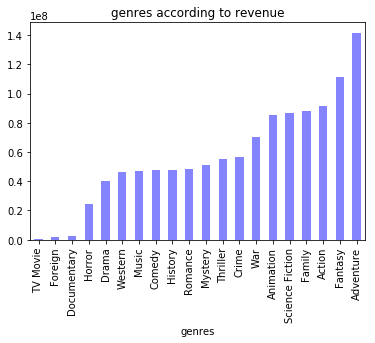

In [15]:
d_genres.groupby('genres').mean()['revenue_adj'].sort_values().plot.bar(color=color_for_bar,title='genres according to revenue')
 

### Research Question 5 (most popular genres of all time?)
the top three are :
- Adventure
- Fantasy
- sci-fi

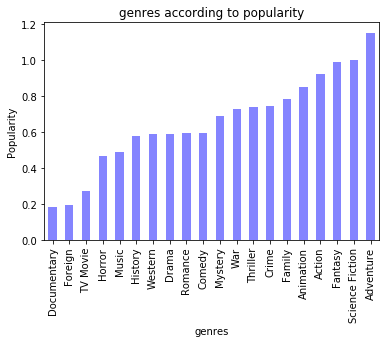

In [16]:
#data is grouped by genre using d_genres and sorted according to mean popularity
d_genres.groupby('genres').mean()['popularity'].sort_values().plot.bar(color=color_for_bar,title='genres according to popularity')
plt.ylabel('Popularity');

### Research Question 6 (what are top 10 highest profit movies?)
the top three are :
- Avatar
- Star Wars
- Titanic

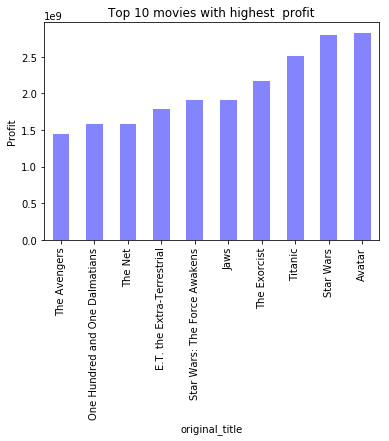

In [17]:

##using groupby() , max() and sorting with respect to profit  we can plot our results  
data.groupby('original_title')['revenue_adj'].max().sort_values().tail(10).plot.bar(color=color_for_bar,title='Top 10 movies with highest  profit')
plt.ylabel('Profit');

### Research Question 7 (what are top 10  titles with longest time?)
the runtime appears very large which is strange ... when I searched for those titles with highest runtime they appeared to be **Tv shows** 
- the pacific https://www.themoviedb.org/tv/16997-the-pacific
- the Story of Film: An Odyssey   https://www.imdb.com/title/tt2044056/


that leads to two suggestions:

   - the data set should have colmun like **type** which describe the title is cenamtic movie or TV show
   - genres should be updated to include **Tv show** or  **Movie**
   
I think knowing the type of show will make more good results

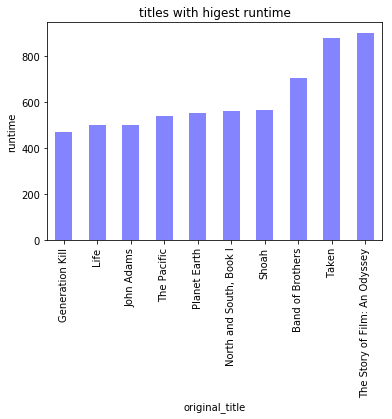

In [18]:
##using groupby() , max() and sorting with respect to profit  we can plot our results  

data.groupby('original_title').max()['runtime'].sort_values().tail(10).plot.bar(color=(.2,.2,1,0.6),title='titles with higest runtime');
plt.ylabel('runtime');


### Research Question 8 (Directors that are most productive?)


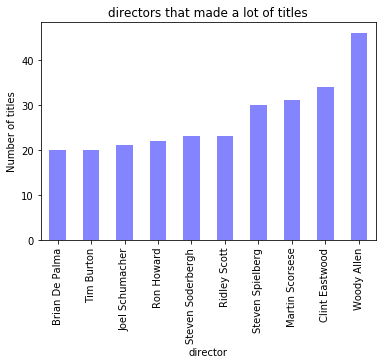

In [19]:
d_director.groupby('director').count()['original_title'].sort_values().tail(10).plot.bar(color=(.2,.2,1,0.6),title='directors that made a lot of titles')
plt.ylabel('Number of titles');

### Research Question 9 (Top 10 directors that make movies with high profit?)


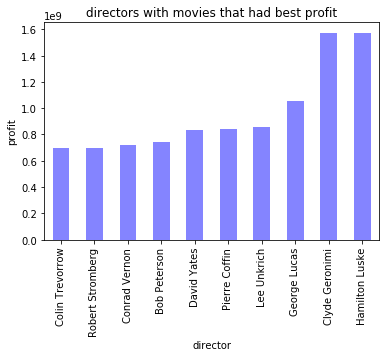

In [20]:
d_director.groupby('director')['revenue_adj'].mean().sort_values().tail(10).plot.bar(color=(.2,.2,1,0.6),title='directors with movies that had best profit')
plt.ylabel('profit');

### Research Question 10 (Most hired Acotrs?)


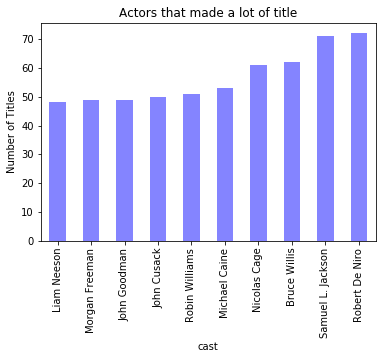

In [21]:
'''
'''
d_cast.groupby('cast').count()['original_title'].sort_values().tail(10).plot.bar(color=(.2,.2,1,0.6),title='Actors that made a lot of title')
plt.ylabel('Number of Titles');

### Research Question 11 (Most productive Companies?)

In [22]:
def pie_chart(data,title_):
    '''
    plots pie plot for dataframe with title
    data:required data frame to plot its data
    title_:title of graph
    '''
    ax=data.plot.pie(title=title_,autopct='%1.2f%%',figsize=(15,20),legend=False)
    #plot pie plot with percentage
     
    patches, labels =ax.get_legend_handles_labels()
    plt.legend(patches, labels,bbox_to_anchor=(1.20, 1.20)); #set place of legend
     
    plt.show()
    

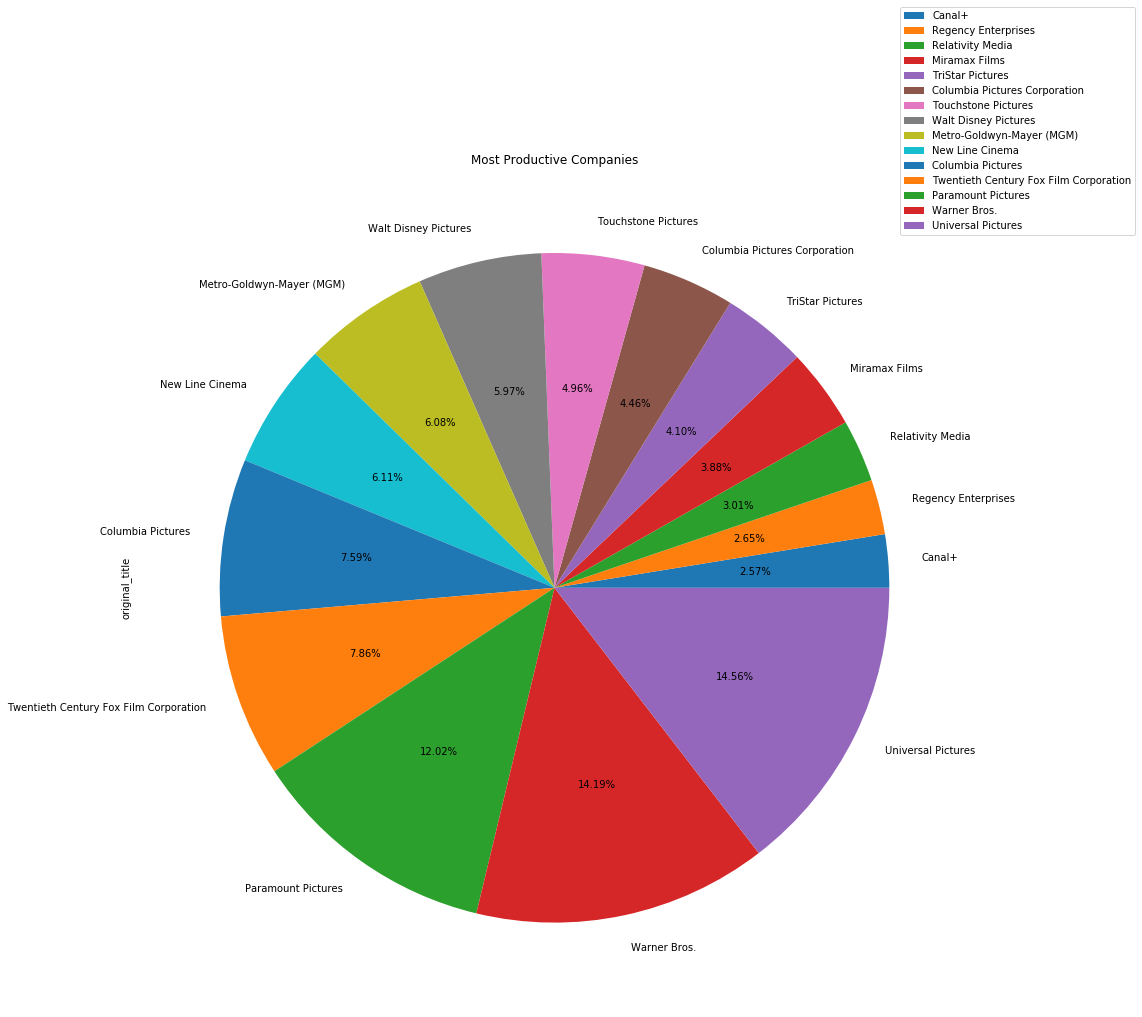

In [23]:
'''using groupby (companies) we can count them according to higshet number of movies
'''
pie_chart(d_companies.groupby('production_companies').count()['original_title'].sort_values().tail(15),'Most Productive Companies')

### Research Question 12 (Companies with highest profit?)

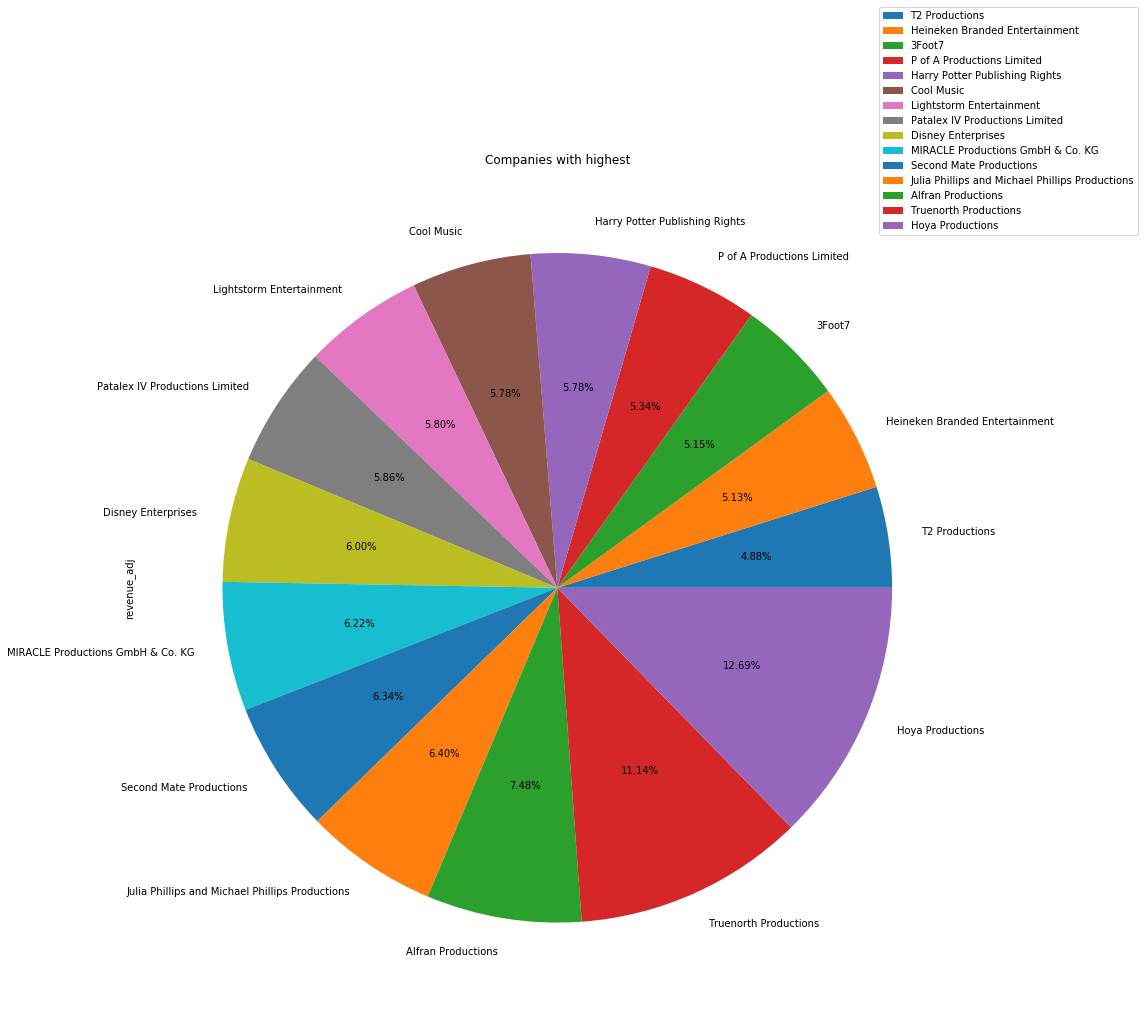

In [24]:
'''
using groupby (companies) we can find mean profit and sort them
'''
pie_chart(d_companies.groupby('production_companies')['revenue_adj'].mean().sort_values().tail(15),'Companies with highest')

### Research Question 13 (What does change when movies seperated from TV shows?)

- accroding to this article https://en.wikipedia.org/wiki/List_of_longest_films the movies with very long time like Experimental films , longest extended cuts and Films released in separate parts not in our list(that on bar plot) in **question7**  and that lead to most of titles with longest time are Tv shows 

- we can set a limit about 200 min to tell if title is movie or TV show 
- this approach may have fualts as there is maybe some longer movies 

from results below :
**most correlations are the similair like before(but correlation factor is lower) but there can be correlation between runtime of TV show and Vote_average** ...the more successful TV show the more it can last longer

the relation isn't strong enough but if data were clearer , I could make progress


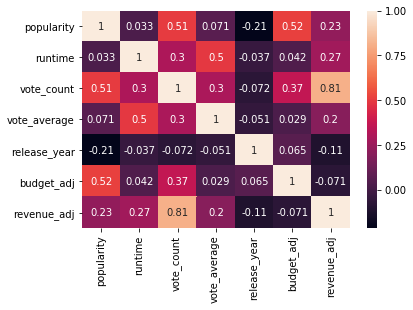

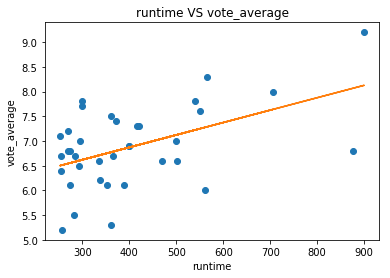

I think Those are Tv shows not movies
415                                         Show Me a Hero
1183                                             Ascension
1235                                              Klondike
1865                                                  Life
2107                                                Carlos
2170                              The Pillars of the Earth
2214                                           The Pacific
2630                                  Storm of the Century
2722                                      Band of Brothers
2843                                       The Blue Planet
3141                                       Generation Kill
3356                                            John Adams
3886                                        Mildred Pierce
3894                         The Story of Film: An Odyssey
4041                                                 Taken
4098                                              Rose Red
4198              

In [25]:
'''
trying to find relations when filtering titles with long time>250 min

'''
sn.heatmap(data[data.runtime>250].corr(), annot=True)
plt.show()
'''
scatter plot for voting and runtime
'''
(x,y)=(data[data.runtime>250].runtime,data[data.runtime>250].vote_average)
plot_scatter_with_line(x,y,'runtime','vote_average','runtime VS vote_average')

data[data.runtime>250].count().runtime## we see that the number of data after flitering is small but most of them are TV show
print('I think Those are Tv shows not movies')
print(data[data.runtime>250].original_title)

<a id='limitations'></a>
## limitations
the data set doesn't have clear evidence to know if a certain title is movie or tv show as in Q67 and Q10 we may use condition like ```(runtime>250) ``` to tell that is Tv show (as most movies about 3 hours) but we should find better way or update or data set from **tmdb**

<a id='conclusions'></a>
## Conclusions

- most popular genre is Adventure
- most hired Actor is Robert De Niro
- most hired director is Robert woody alan
- the top higest profit movie is Avatr
- the director that makes movies with great profit is Hamilton Luske
- the company which has highest profit is Hoya
- genres with highest run time is history(I think becuase it has many TV shows)
- Tv show with long runtime is The Story of Film: An Odyssey
- we see that most of data has no correlation but the following are correlated:
    - profit and budget 
    - profit and popularity 
    - profit and vote_count
    - vote_count and popularity 